In [1]:
import numpy as np
# import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook 
import math

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

from kivy.interactive import InteractiveLauncher
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.graphics import Line
# from kivy.config import Config



[INFO   ] [Logger      ] Record log in /Users/ahish/.kivy/logs/kivy_19-12-29_38.txt
[INFO   ] [Kivy        ] v1.11.1
[INFO   ] [Kivy        ] Installed at "/Users/ahish/epicircle/lib/python3.6/site-packages/kivy/__init__.py"
[INFO   ] [Python      ] v3.6.6 (v3.6.6:4cf1f54eb7, Jun 26 2018, 19:50:54) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
[INFO   ] [Python      ] Interpreter at "/usr/local/Cellar/python/3.7.6/bin/python3.7"
[INFO   ] [Factory     ] 184 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_sdl2, img_gif (img_pil, img_ffpyplayer ignored)
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL ES 2" graphics system
[INFO   ] [GL          ] Backend used <sdl2>
[INFO   ] [GL          ] OpenGL version <b'2.1 ATI-2.11.20'>
[INFO   ] [GL          ] OpenGL vendor <b'ATI Technologies Inc.'>
[INFO   ] [GL          ] OpenGL renderer <b'AMD Radeon Pro 560 OpenGL Engine'>
[INFO   ] [GL          ] OpenGL parsed

In [2]:
# Config.set('graphics', 'width', '800')
# Config.set('graphics', 'height', '800')
pointsTouched = []

class DrawInput(Widget):

    def on_touch_down(self, touch):
        
        global pointsTouched
        with self.canvas:
            touch.ud["line"] = Line(points=(touch.x, touch.y))
            pointsTouched += [(int(touch.x/2), int(touch.y/2))]

    def on_touch_move(self, touch):
        
        global pointsTouched
        touch.ud["line"].points += (touch.x, touch.y)
        pointsTouched += [(int(touch.x/2), int(touch.y/2))]
        
class drawingBoard(App):

    def build(self):
        return DrawInput()

drawingBoard().run()
    

In [3]:
# settings
samplePercentage = 1 #percentage

In [4]:
sampledPoints_array = pointsTouched[::int(1/samplePercentage)]

In [5]:
#generate complex points numpy array
sampledPoints = np.empty(len(sampledPoints_array), np.csingle)
for i in range(len(sampledPoints_array)):
    pair = sampledPoints_array[i]
    sampledPoints[i] = complex(pair[0], pair[1])

In [6]:
N = len(sampledPoints)
points_fft = np.fft.fft(sampledPoints, N)

In [7]:
t = len(sampledPoints)
generated_function = [0 for i in range(t)]

for tau in range(t):
    for k in range(len(points_fft)):
        
        # inverse fourier transform
        time = tau
        generated_function[tau] += points_fft[k]*(math.e**(1j*2*math.pi*k*time/N))
        

<IPython.core.display.Javascript object>


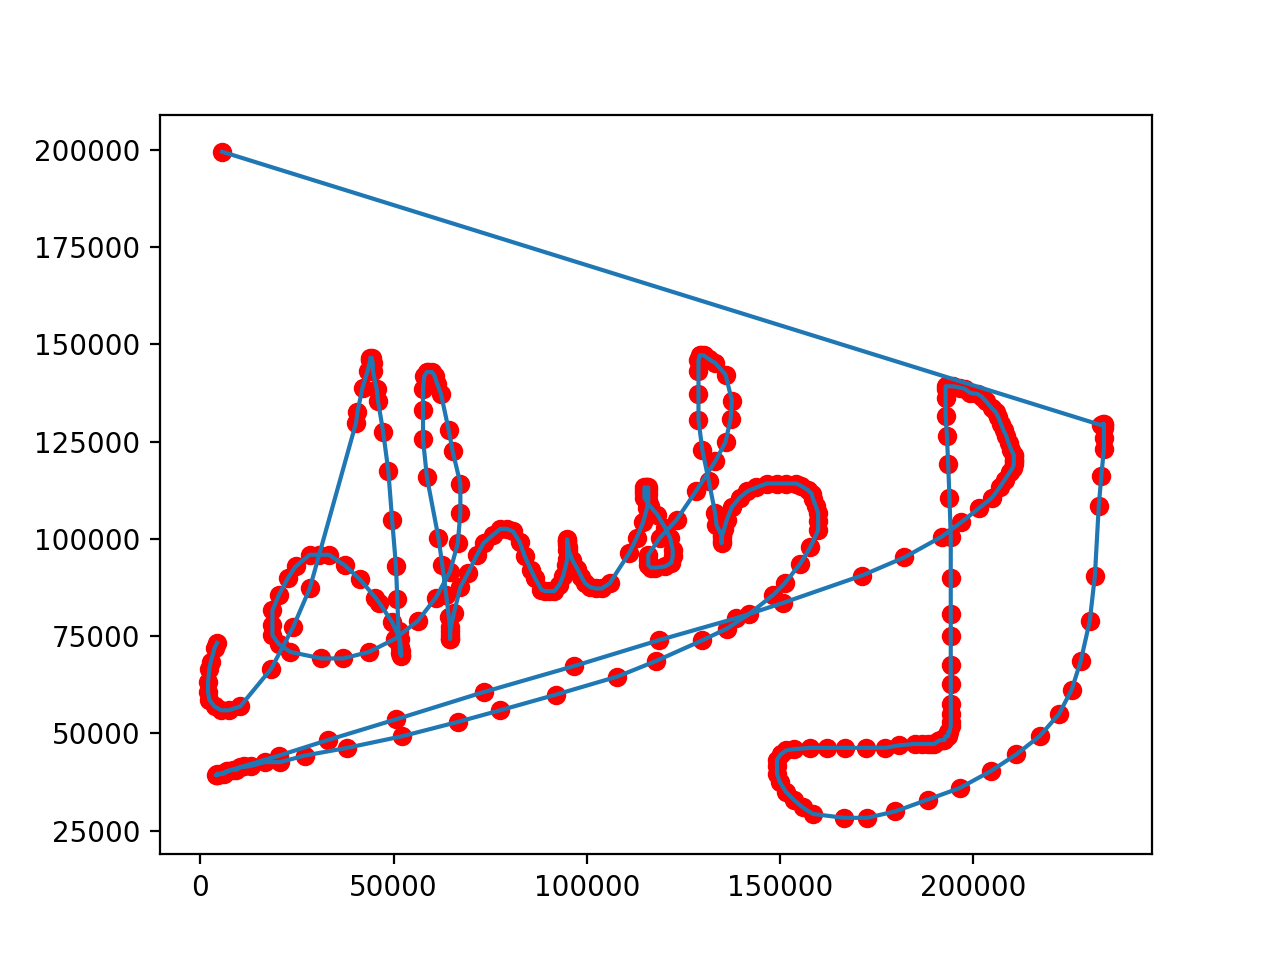

In [8]:
real = list(map(lambda x: x.real, generated_function))
imag = list(map(lambda x: x.imag, generated_function))

plt.plot(real, imag)
plt.show()

In [9]:
plt.scatter(real, imag, color='red')
plt.show()

In [10]:
# animation
abs_fft = np.absolute(points_fft)
phase_fft = np.angle(points_fft)
#k: 0 -> N
w = 2*math.pi/N
n_circles = len(points_fft)
circlePos = [(0,0)]
loc_x = 0
loc_y = 0

time = 0
for i in range(len(points_fft)):
    
    loc_x += abs_fft[i]*math.cos(i*w*time + phase_fft[i])
    loc_y += abs_fft[i]*math.sin(i*w*time + phase_fft[i])
    
    circlePos += [(loc_x, loc_y)]


In [11]:
def pos_at(time, abs_fft, phase_fft):
    
    circlePos = [(0,0)]
    loc_x = 0
    loc_y = 0
    w = 2*math.pi/N
    
    for i in range(len(points_fft)):

        loc_x += abs_fft[i]*math.cos((i)*w*time + phase_fft[i])
        loc_y += abs_fft[i]*math.sin((i)*w*time + phase_fft[i])

        circlePos += [(loc_x, loc_y)]
    
    return circlePos

<IPython.core.display.Javascript object>


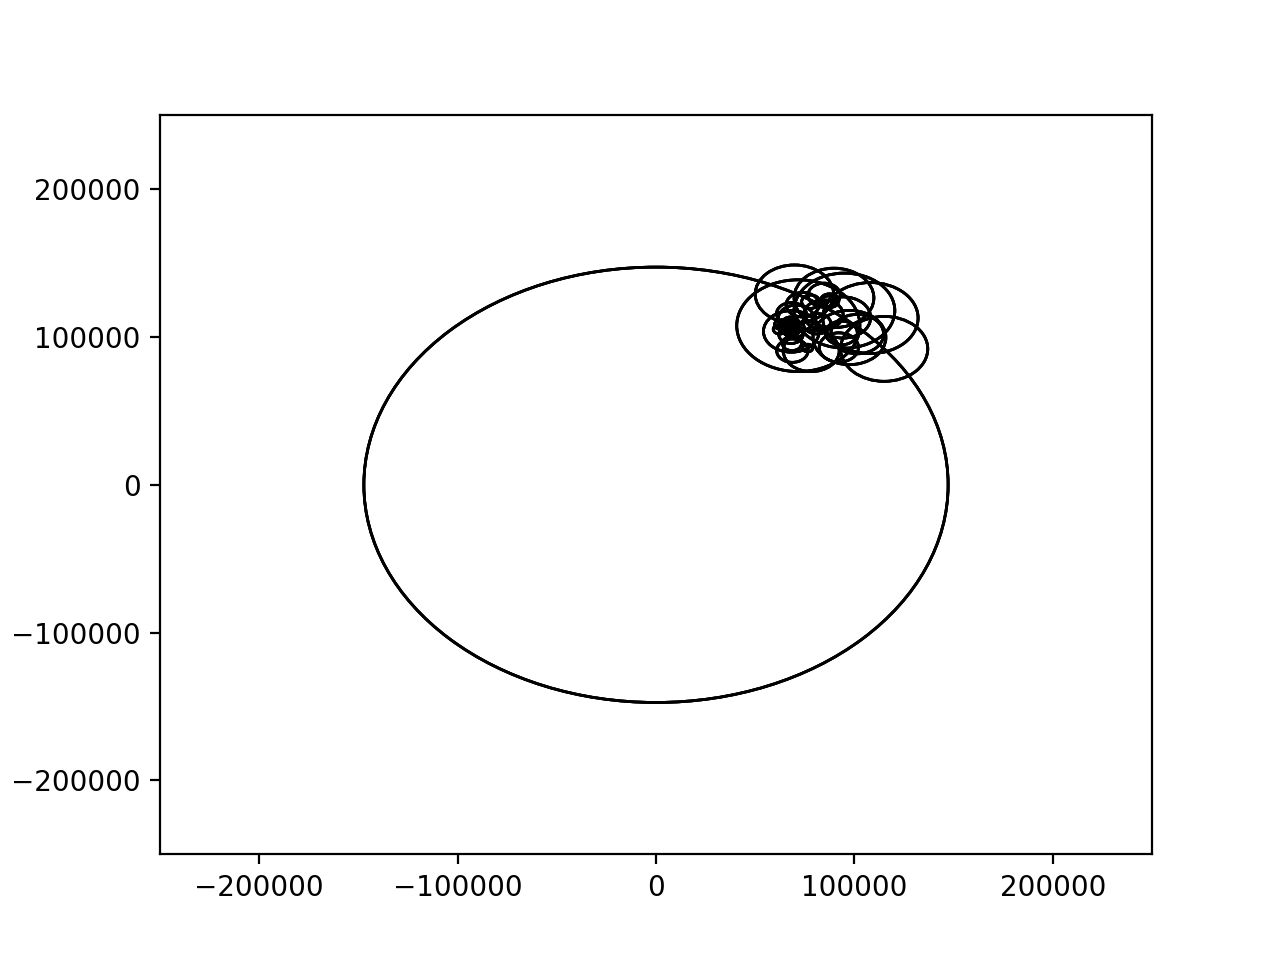

In [13]:
fig = plt.figure()
ax = plt.axes(xlim=(-250000, 250000), ylim=(-250000, 250000))

initCirclesPos = pos_at(0, abs_fft, phase_fft)
circles = []
for i in range(n_circles):
    circles += [plt.Circle(initCirclesPos[i], abs_fft[i], fill=False)]
circles += [plt.Circle((real[0], imag[0]), 40)]
    
def init():
    
    initCirclesPos = pos_at(0, abs_fft, phase_fft)
   
    for i in range(n_circles):
        circles[i].center = initCirclesPos[i]
        ax.add_patch(circles[i])
    
    circles[n_circles].center = (real[0], imag[0])
    ax.add_patch(circles[-1])
    
    return [circles]

def animate(i):
 
    newCirclesPos = pos_at(i, abs_fft, phase_fft)
    
    for m in range(n_circles):
        circles[m].center = newCirclesPos[m]
    
    circles[n_circles].center = (real[int(i)], imag[int(i)])
    return [circles]

anim=FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=False)

plt.show()
        
        